### Generate unigrams, bigrams, and trigrams and TF-IDF using sklearn library.

In [31]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import movie_reviews, stopwords
from nltk.util import ngrams
from tabulate import tabulate

In [19]:
stoplist = set(stopwords.words("english"))

In [20]:
def create_word_features(words):
    print("Original words:", words[:10], "...")
    useful_words = [word for word in words if word.lower() not in stoplist]
    print("Useful words (after removing stopwords):", useful_words[:10], "...")
    word_features = dict([(word, True) for word in useful_words])
    print("Word features dictionary sample:", list(word_features.items())[:10])
    return word_features

In [22]:
def create_ngram_features(words, n=2):
    print(f"Creating {n}-gram features...")
    words = [word.lower() for word in words]
    ngram_vocab = ngrams(words, n)
    ngram_features = dict([(ng, True) for ng in ngram_vocab])
    print(f"Sample {n}-grams:", list(ngram_features.keys())[:5])
    return ngram_features

In [6]:
nltk.download('movie_reviews')
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
print("\nLoading positive reviews...")
pos_data = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    features = create_word_features(words)
    pos_data.append((features, "positive"))


Loading positive reviews...
Original words: ['films', 'adapted', 'from', 'comic', 'books', 'have', 'had', 'plenty', 'of', 'success'] ...
Useful words (after removing stopwords): ['films', 'adapted', 'comic', 'books', 'plenty', 'success', ',', 'whether', "'", 'superheroes'] ...
Word features dictionary sample: [('films', True), ('adapted', True), ('comic', True), ('books', True), ('plenty', True), ('success', True), (',', True), ('whether', True), ("'", True), ('superheroes', True)]
Original words: ['every', 'now', 'and', 'then', 'a', 'movie', 'comes', 'along', 'from', 'a'] ...
Useful words (after removing stopwords): ['every', 'movie', 'comes', 'along', 'suspect', 'studio', ',', 'every', 'indication', 'stinker'] ...
Word features dictionary sample: [('every', True), ('movie', True), ('comes', True), ('along', True), ('suspect', True), ('studio', True), (',', True), ('indication', True), ('stinker', True), ('everybody', True)]
Original words: ['you', "'", 've', 'got', 'mail', 'works', 

In [24]:
print("\nLoading negative reviews...")
neg_data = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    features = create_word_features(words)
    neg_data.append((features, "negative"))


Loading negative reviews...
Original words: ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party'] ...
Useful words (after removing stopwords): ['plot', ':', 'two', 'teen', 'couples', 'go', 'church', 'party', ',', 'drink'] ...
Word features dictionary sample: [('plot', True), (':', True), ('two', True), ('teen', True), ('couples', True), ('go', True), ('church', True), ('party', True), (',', True), ('drink', True)]
Original words: ['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', 'review', 'damn', 'that'] ...
Useful words (after removing stopwords): ['happy', 'bastard', "'", 'quick', 'movie', 'review', 'damn', 'y2k', 'bug', '.'] ...
Word features dictionary sample: [('happy', True), ('bastard', True), ("'", True), ('quick', True), ('movie', True), ('review', True), ('damn', True), ('y2k', True), ('bug', True), ('.', True)]
Original words: ['it', 'is', 'movies', 'like', 'these', 'that', 'make', 'a', 'jaded', 'movie'] ...
Useful words (after removing stopwords

In [25]:
del(train_set, test_set)
print("\nCreating training and test sets...")
train_set = pos_data[:800] + neg_data[:800]
test_set = pos_data[800:] + neg_data[800:]

print(f"Training on {len(train_set)} examples.")
print(f"Testing on {len(test_set)} examples.")


Creating training and test sets...
Training on 1600 examples.
Testing on 400 examples.


In [26]:
print("\nTraining the Naive Bayes Classifier...")
classifier = NaiveBayesClassifier.train(train_set)


Training the Naive Bayes Classifier...


In [27]:
print("\nEvaluating classifier accuracy...")
accuracy = nltk.classify.util.accuracy(classifier, test_set)
print("Accuracy on test set:", round(accuracy * 100, 2), "%")


Evaluating classifier accuracy...
Accuracy on test set: 72.5 %


In [28]:
print("\nMost Informative Features:")
classifier.show_most_informative_features(10)


Most Informative Features:
Most Informative Features
             outstanding = True           positi : negati =     13.9 : 1.0
               insulting = True           negati : positi =     13.7 : 1.0
              vulnerable = True           positi : negati =     13.0 : 1.0
               ludicrous = True           negati : positi =     12.6 : 1.0
             uninvolving = True           negati : positi =     12.3 : 1.0
              astounding = True           positi : negati =     11.7 : 1.0
                  avoids = True           positi : negati =     11.7 : 1.0
             fascination = True           positi : negati =     11.0 : 1.0
               affecting = True           positi : negati =     10.3 : 1.0
               animators = True           positi : negati =     10.3 : 1.0


In [32]:
# Store results for final table
ngram_accuracies = []

print("\n===== N-GRAM MODELS (n=1 to 5) =====")
for n in range(1, 6):
    print(f"\n----- Processing {n}-grams -----")

    pos_data = []
    for fileid in movie_reviews.fileids('pos'):
        words = movie_reviews.words(fileid)
        pos_data.append((create_ngram_features(words, n), "positive"))

    neg_data = []
    for fileid in movie_reviews.fileids('neg'):
        words = movie_reviews.words(fileid)
        neg_data.append((create_ngram_features(words, n), "negative"))

    train_set = pos_data[:800] + neg_data[:800]
    test_set = pos_data[800:] + neg_data[800:]

    print(f"Training classifier on {n}-gram features ({len(train_set)} samples)...")
    classifier = NaiveBayesClassifier.train(train_set)

    accuracy = nltk.classify.util.accuracy(classifier, test_set)
    accuracy_percent = round(accuracy * 100, 2)
    print(f"{n}-gram Accuracy:", accuracy_percent, "%")

    ngram_accuracies.append((f"{n}-gram", f"{accuracy_percent}%"))

    if n == 1:
        print("\nMost Informative Features for 1-gram model:")
        classifier.show_most_informative_features(10)

#'' Fi''''''''''''''''''''''''''''''''''''nal results table
print("\n\n===== Accuracy Comparison Table =====")
print(tabulate(ngram_accuracies, headers=["N-gram", "Accuracy"], tablefmt="pretty"))

Streaming output truncated to the last 5000 lines.
Creating 4-gram features...
Sample 4-grams: [('synopsis', ':', 'nice', 'girl'), (':', 'nice', 'girl', 'susanne'), ('nice', 'girl', 'susanne', 'has'), ('girl', 'susanne', 'has', 'sex'), ('susanne', 'has', 'sex', 'with')]
Creating 4-gram features...
Sample 4-grams: [('well', 'lets', 'see', '.'), ('lets', 'see', '.', '.'), ('see', '.', '.', '.'), ('.', '.', '.', 'i'), ('.', '.', 'i', "'")]
Creating 4-gram features...
Sample 4-grams: [('14', 'years', 'ago', ','), ('years', 'ago', ',', 'national'), ('ago', ',', 'national', 'lampoon'), (',', 'national', 'lampoon', 'introduced'), ('national', 'lampoon', 'introduced', 'us')]
Creating 4-gram features...
Sample 4-grams: [('plunkett', '&', 'macleane', 'marks'), ('&', 'macleane', 'marks', 'the'), ('macleane', 'marks', 'the', 'directing'), ('marks', 'the', 'directing', 'debut'), ('the', 'directing', 'debut', 'of')]
Creating 4-gram features...
Sample 4-grams: [('capsule', ':', 'silly', 'and'), (':',

### Word co-occurrence matrix generation for given window size and similarity between word vectors

In [33]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
nltk.download('punkt')
nltk.download('movie_reviews')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [53]:
# 📥 Load 10 positive and 10 negative reviews
texts = []
for fileid in movie_reviews.fileids('pos')[:20]:
    texts.append(movie_reviews.raw(fileid))
for fileid in movie_reviews.fileids('neg')[:20]:
    texts.append(movie_reviews.raw(fileid))

In [60]:
texts

['films adapted from comic books have had plenty of success , whether they\'re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there\'s never really been a comic book like from hell before . \nfor starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid \'80s with a 12-part series called the watchmen . \nto say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . \nthe book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . \nin other words , don\'t dismiss this film because of its source . \nif you can get past the whole comic book thing , you might find another stumbling block in from hell\'s directors , albert and allen hughes . \ngetting the hughes brothers to direct this see

In [54]:
def clean_tokens(text):
    tokens = word_tokenize(text.lower())
    return [token for token in tokens if token.isalpha()]  # keep only alphabetic words

In [55]:
tokenized_docs = [clean_tokens(doc) for doc in texts]

In [56]:
vocab = sorted(set(word for doc in tokenized_docs for word in doc))
word2idx = {word: idx for idx, word in enumerate(vocab)}

In [57]:
window_size = 2
co_matrix = np.zeros((len(vocab), len(vocab)))

for tokens in tokenized_docs:
    for i, word in enumerate(tokens):
        word_idx = word2idx[word]
        start = max(i - window_size, 0)
        end = min(i + window_size + 1, len(tokens))
        for j in range(start, end):
            if i != j:
                context_word = tokens[j]
                context_idx = word2idx[context_word]
                co_matrix[word_idx, context_idx] += 1

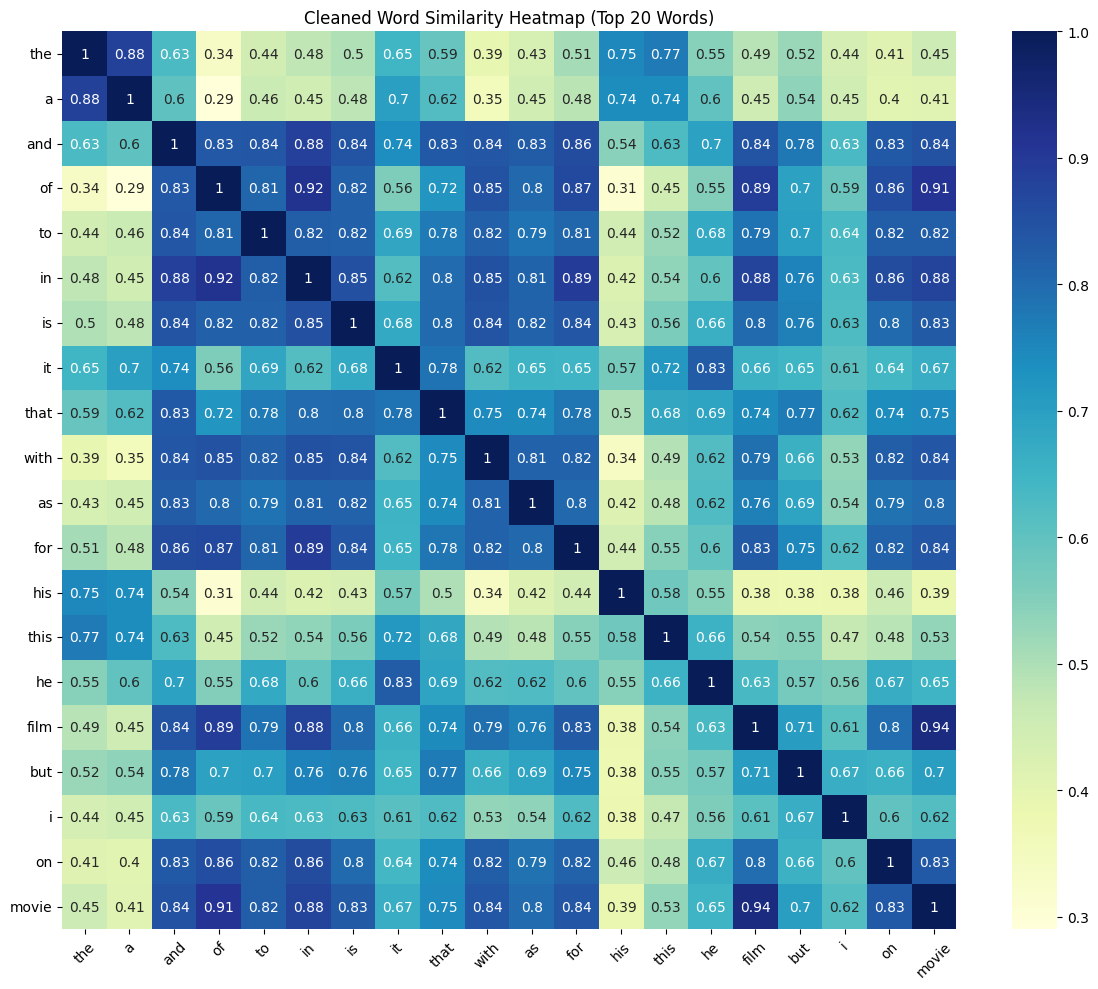

In [58]:
similarity_matrix = cosine_similarity(co_matrix)

similarity_df = pd.DataFrame(similarity_matrix, index=vocab, columns=vocab)

from collections import Counter
flat_tokens = [word for doc in tokenized_docs for word in doc]
most_common_words = [word for word, _ in Counter(flat_tokens).most_common(20)]

plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df.loc[most_common_words, most_common_words], annot=True, cmap='YlGnBu')
plt.title("Cleaned Word Similarity Heatmap (Top 20 Words)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [59]:
# 📏 Show co-occurrence matrix shape and example
print(f"\n✅ Co-occurrence Matrix Shape: {co_matrix.shape}")
print(f"\n✅ Sample word similarity (e.g. between 'the' and 'movie'):\n")
if 'the' in word2idx and 'movie' in word2idx:
    print(f"Similarity between 'the' and 'movie': {similarity_df.loc['the', 'movie']:.4f}")
else:
    print("Words 'the' or 'movie' not found in vocabulary.")


✅ Co-occurrence Matrix Shape: (5052, 5052)

✅ Sample word similarity (e.g. between 'the' and 'movie'):

Similarity between 'the' and 'movie': 0.4546
